In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
movies_df=pd.read_csv('tips.csv')

# Assignment 1

In [56]:
movies_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
movies_df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [58]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [59]:
movies_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [60]:
movies_df.index

RangeIndex(start=0, stop=244, step=1)

In [61]:
movies_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [62]:
movies_df.shape

(244, 7)

In [63]:
movies_df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [64]:
movies_df.columns.values

array(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'],
      dtype=object)

In [65]:
movies_df.sort_index(axis=1)

,day,sex,size,smoker,time,tip,total_bill
0,Sun,Female,2,No,Dinner,1.01,16.99
1,Sun,Male,3,No,Dinner,1.66,10.34
2,Sun,Male,3,No,Dinner,3.50,21.01
3,Sun,Male,2,No,Dinner,3.31,23.68
4,Sun,Female,4,No,Dinner,3.61,24.59
...,...,...,...,...,...,...,...
239,Sat,Male,3,No,Dinner,5.92,29.03
240,Sat,Female,2,Yes,Dinner,2.00,27.18
241,Sat,Male,2,Yes,Dinner,2.00,22.67
242,Sat,Male,2,No,Dinner,1.75,17.82


In [66]:
movies_df.iloc[0:2]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [67]:
movies_df[0:1]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [68]:
movies_df.iloc[0:1,1:2]

,tip
0,1.01


In [69]:
movies_df.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [70]:
movies_df.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [71]:
movies_df.isnull().sum().sum()

0

# Assignment 2

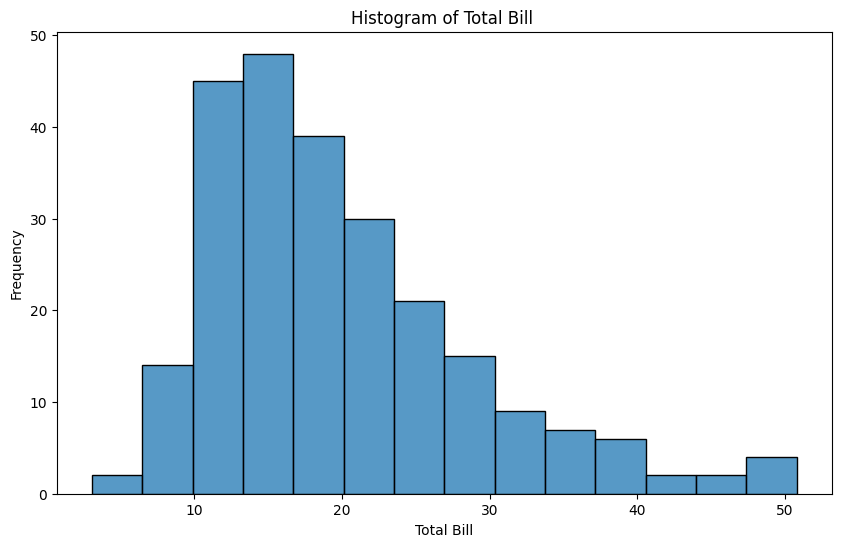

In [72]:
# using 'total_bill' column for analysis
# Creating a histogram 
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['total_bill'])
plt.title('Histogram of Total Bill ')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

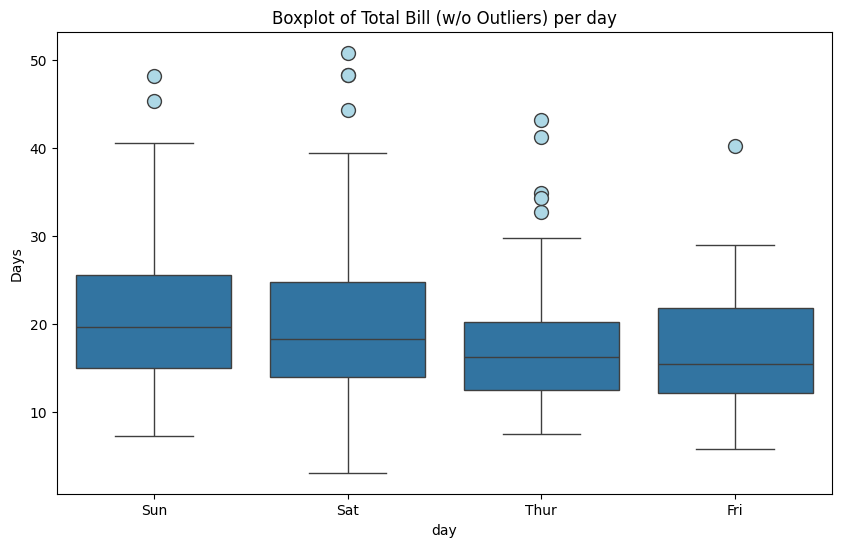

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=movies_df['total_bill'],
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10),x=movies_df['day'])
# can use whis=1 whisker value,as whistkers len is 1.5x of IQR by default
plt.title('Boxplot of Total Bill (w/o Outliers) per day')
plt.ylabel('total_bill')
plt.ylabel('Days')
plt.show()

In [74]:
# finding outliers using IQR
Q1 = movies_df['total_bill'].quantile(0.25)
Q3 = movies_df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
movies_df_filtered = movies_df[(movies_df['total_bill'] >= lower_bound) & (movies_df['total_bill'] <= upper_bound)]
print(len(movies_df_filtered['total_bill']))

235


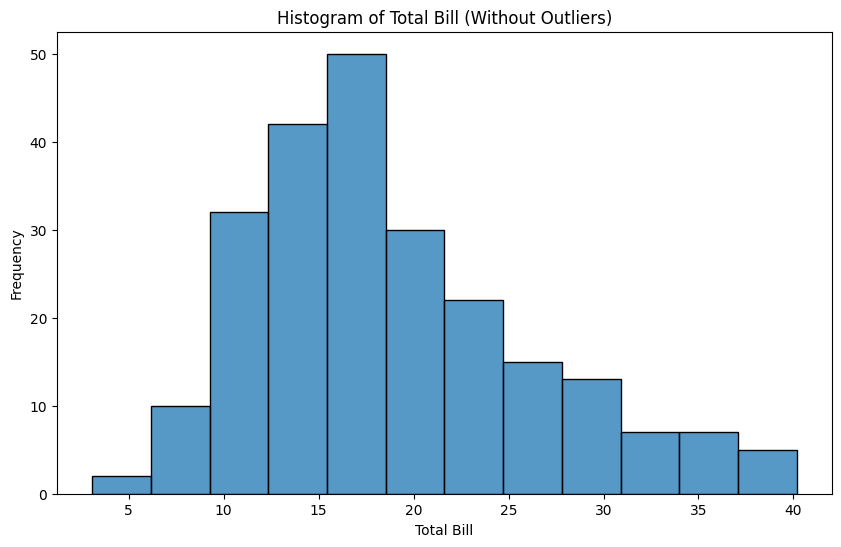

In [75]:
# Creating hist w/o outliers
plt.figure(figsize=(10, 6))
sns.histplot(movies_df_filtered['total_bill'])
plt.title('Histogram of Total Bill (Without Outliers)')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

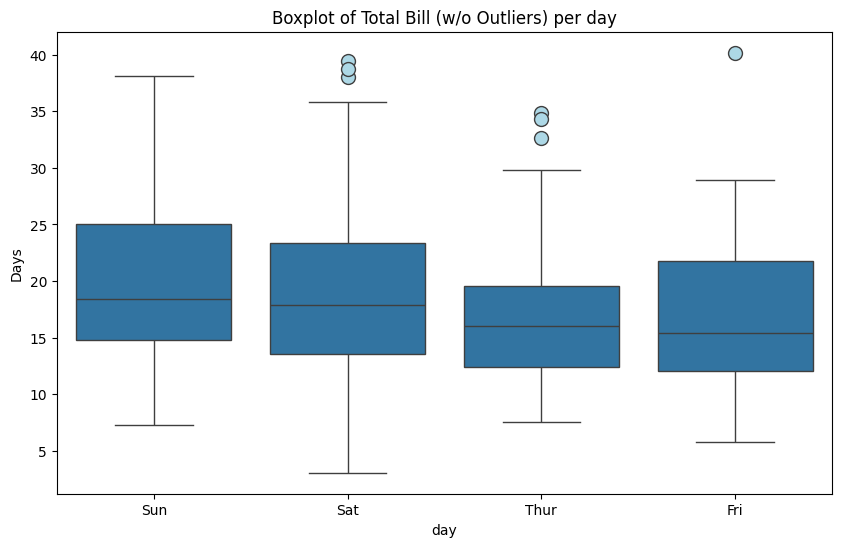

In [76]:
# boxplot w/o outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=movies_df_filtered['total_bill'],
            flierprops=dict(marker='o', markerfacecolor='lightblue', markersize=10),x=movies_df['day'])
plt.title('Boxplot of Total Bill (w/o Outliers) per day')
plt.ylabel('total_bill')
plt.ylabel('Days')
plt.show()